<a href="https://colab.research.google.com/github/jtndr26/EV_Segmentation/blob/EV_Segmentation/EV_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Electric Vehicle Segmentation in Indian Market.

---
Contributor : Jeetendra Sarpe



In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

In [3]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
path = "/content/drive/My Drive/Feynn_Labs/EV_Market_Segmentation/EV_Segmentation/"
df = pd.read_csv(path+'EVIndia.csv')
df

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,5 Seater,350 L,XM,Dark XZ Plus LUX
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,₹ 12.49 - 13.64 L,5 Seater,316 L,XE,XZ Plus Dual Tone
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,₹ 17.74 - 19.24 L,5 Seater,350 L,XZ Plus 3.3 kW,XZ Plus Lux 7.2 kW
3,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,₹ 21.99 - 25.88 L,5 Seater,448 L,Excite,Exclusive
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,₹ 23.79 - 23.98 L,5 Seater,na,Premium Dual Tone,HSE
5,Jaguar I-Pace,Premium Midsize Sedan,470 Km/Full Charge,Automatic,Electric,₹ 1.06 - 1.12 Cr,5 Seater,656 L,S,Sportback 55
6,Audi E-Tron GT,Premium Coupe,388 Km/Full Charge,Automatic,Electric,₹ 1.8 Cr,5 Seater,405 L,Quattro,na
7,BYD E6,Subcompact MPV,415 Km/Full Charge,Automatic,Electric,₹ 29.15 L,5 Seater,580 L,STD,na
8,Mercedes-Benz EQC,Compact SUV,471 Km/Full Charge,Automatic,Electric,₹ 1 Cr,5 Seater,na,na,na
9,BMW iX,Premium Fullsize SUV,425 Km/Full Charge,Automatic,Electric,₹ 1.16 Cr,5 Seater,na,na,na


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car           12 non-null     object
 1   Style         12 non-null     object
 2   Range         12 non-null     object
 3   Transmission  12 non-null     object
 4   VehicleType   12 non-null     object
 5   PriceRange    12 non-null     object
 6   Capacity      12 non-null     object
 7   BootSpace     12 non-null     object
 8   BaseModel     12 non-null     object
 9   TopModel      12 non-null     object
dtypes: object(10)
memory usage: 1.1+ KB


In [6]:
df.rename(columns = {'Range':'Range(Km/Full Charge)'},inplace = True)
df

,Car,Style,Range(Km/Full Charge),Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,5 Seater,350 L,XM,Dark XZ Plus LUX
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,₹ 12.49 - 13.64 L,5 Seater,316 L,XE,XZ Plus Dual Tone
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,₹ 17.74 - 19.24 L,5 Seater,350 L,XZ Plus 3.3 kW,XZ Plus Lux 7.2 kW
3,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,₹ 21.99 - 25.88 L,5 Seater,448 L,Excite,Exclusive
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,₹ 23.79 - 23.98 L,5 Seater,na,Premium Dual Tone,HSE
5,Jaguar I-Pace,Premium Midsize Sedan,470 Km/Full Charge,Automatic,Electric,₹ 1.06 - 1.12 Cr,5 Seater,656 L,S,Sportback 55
6,Audi E-Tron GT,Premium Coupe,388 Km/Full Charge,Automatic,Electric,₹ 1.8 Cr,5 Seater,405 L,Quattro,na
7,BYD E6,Subcompact MPV,415 Km/Full Charge,Automatic,Electric,₹ 29.15 L,5 Seater,580 L,STD,na
8,Mercedes-Benz EQC,Compact SUV,471 Km/Full Charge,Automatic,Electric,₹ 1 Cr,5 Seater,na,na,na
9,BMW iX,Premium Fullsize SUV,425 Km/Full Charge,Automatic,Electric,₹ 1.16 Cr,5 Seater,na,na,na


In [7]:
df['Range(Km/Full Charge)'] = df['Range(Km/Full Charge)'].apply(lambda x:x.split()[0])
df

,Car,Style,Range(Km/Full Charge),Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel
0,Tata Nexon EV,Compact SUV,312,Automatic,Electric,₹ 13.99 - 17.4 L,5 Seater,350 L,XM,Dark XZ Plus LUX
1,Tata Tigor EV,Subcompact Sedan,306,Automatic,Electric,₹ 12.49 - 13.64 L,5 Seater,316 L,XE,XZ Plus Dual Tone
2,Tata Nexon EV Max,Compact SUV,437,Automatic,Electric,₹ 17.74 - 19.24 L,5 Seater,350 L,XZ Plus 3.3 kW,XZ Plus Lux 7.2 kW
3,MG ZS EV,Compact SUV,419,Automatic,Electric,₹ 21.99 - 25.88 L,5 Seater,448 L,Excite,Exclusive
4,Hyundai Kona Electric,Compact SUV,452,Automatic,Electric,₹ 23.79 - 23.98 L,5 Seater,na,Premium Dual Tone,HSE
5,Jaguar I-Pace,Premium Midsize Sedan,470,Automatic,Electric,₹ 1.06 - 1.12 Cr,5 Seater,656 L,S,Sportback 55
6,Audi E-Tron GT,Premium Coupe,388,Automatic,Electric,₹ 1.8 Cr,5 Seater,405 L,Quattro,na
7,BYD E6,Subcompact MPV,415,Automatic,Electric,₹ 29.15 L,5 Seater,580 L,STD,na
8,Mercedes-Benz EQC,Compact SUV,471,Automatic,Electric,₹ 1 Cr,5 Seater,na,na,na
9,BMW iX,Premium Fullsize SUV,425,Automatic,Electric,₹ 1.16 Cr,5 Seater,na,na,na


In [8]:
df.replace('na',np.nan,inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Car                    12 non-null     object
 1   Style                  12 non-null     object
 2   Range(Km/Full Charge)  11 non-null     object
 3   Transmission           12 non-null     object
 4   VehicleType            12 non-null     object
 5   PriceRange             12 non-null     object
 6   Capacity               12 non-null     object
 7   BootSpace              8 non-null      object
 8   BaseModel              8 non-null      object
 9   TopModel               6 non-null      object
dtypes: object(10)
memory usage: 1.1+ KB


In [9]:
df = df.iloc[:,:-3]
df['Range(Km/Full Charge)'] = df['Range(Km/Full Charge)'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Car                    12 non-null     object 
 1   Style                  12 non-null     object 
 2   Range(Km/Full Charge)  11 non-null     float64
 3   Transmission           12 non-null     object 
 4   VehicleType            12 non-null     object 
 5   PriceRange             12 non-null     object 
 6   Capacity               12 non-null     object 
dtypes: float64(1), object(6)
memory usage: 800.0+ bytes


In [10]:
df['Range(Km/Full Charge)'].agg(['mean','median'])

mean      408.636364
median    419.000000
Name: Range(Km/Full Charge), dtype: float64

<Axes: >

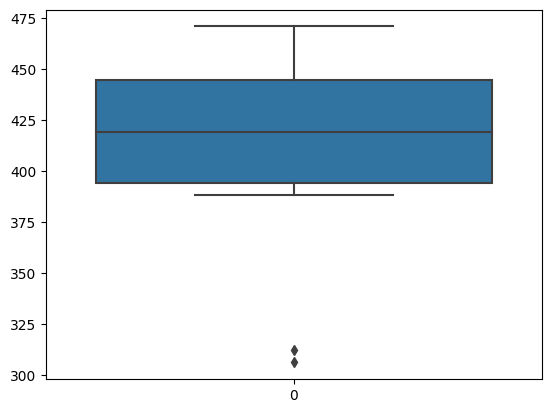

In [11]:
sns.boxplot(df['Range(Km/Full Charge)'])

In [12]:
df['Range(Km/Full Charge)'].replace(np.nan,round(df['Range(Km/Full Charge)'].mean()),inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Car                    12 non-null     object 
 1   Style                  12 non-null     object 
 2   Range(Km/Full Charge)  12 non-null     float64
 3   Transmission           12 non-null     object 
 4   VehicleType            12 non-null     object 
 5   PriceRange             12 non-null     object 
 6   Capacity               12 non-null     object 
dtypes: float64(1), object(6)
memory usage: 800.0+ bytes


In [13]:
df['PriceRange'].replace(" ","",inplace = True)
df

,Car,Style,Range(Km/Full Charge),Transmission,VehicleType,PriceRange,Capacity
0,Tata Nexon EV,Compact SUV,312.0,Automatic,Electric,₹ 13.99 - 17.4 L,5 Seater
1,Tata Tigor EV,Subcompact Sedan,306.0,Automatic,Electric,₹ 12.49 - 13.64 L,5 Seater
2,Tata Nexon EV Max,Compact SUV,437.0,Automatic,Electric,₹ 17.74 - 19.24 L,5 Seater
3,MG ZS EV,Compact SUV,419.0,Automatic,Electric,₹ 21.99 - 25.88 L,5 Seater
4,Hyundai Kona Electric,Compact SUV,452.0,Automatic,Electric,₹ 23.79 - 23.98 L,5 Seater
5,Jaguar I-Pace,Premium Midsize Sedan,470.0,Automatic,Electric,₹ 1.06 - 1.12 Cr,5 Seater
6,Audi E-Tron GT,Premium Coupe,388.0,Automatic,Electric,₹ 1.8 Cr,5 Seater
7,BYD E6,Subcompact MPV,415.0,Automatic,Electric,₹ 29.15 L,5 Seater
8,Mercedes-Benz EQC,Compact SUV,471.0,Automatic,Electric,₹ 1 Cr,5 Seater
9,BMW iX,Premium Fullsize SUV,425.0,Automatic,Electric,₹ 1.16 Cr,5 Seater


In [14]:
df['PriceRange'][5].split(),df['PriceRange'][8].split()

(['₹', '1.06', '-', '1.12', 'Cr'], ['₹', '1', 'Cr'])

In [15]:
df.loc[0,'PriceRange'].split()

['₹', '13.99', '-', '17.4', 'L']

In [16]:
df['Base Price(L)'] = 0
df['Top Price(L)'] = 0
for i in range(len(df)):
  x = df.loc[i,'PriceRange'].split()
  if (len(x) > 3) and (x[-1] == 'L'):
    df.loc[i,'Base Price(L)'] = float(x[1])
    df.loc[i,'Top Price(L)']  = float(x[3])
  elif (len(x) > 3) and (x[-1] == 'Cr'):
    df.loc[i,'Base Price(L)'] = float(x[1])*100
    df.loc[i,'Top Price(L)']  = float(x[3])*100
  elif (len(x) <= 3) and (x[-1] == 'L'):
    df.loc[i,'Base Price(L)'] = float(x[1])
    df.loc[i,'Top Price(L)']  = float(x[1])
  else:
    df.loc[i,'Base Price(L)'] = float(x[1])*100
    df.loc[i,'Top Price(L)']  = float(x[1])*100    

df

,Car,Style,Range(Km/Full Charge),Transmission,VehicleType,PriceRange,Capacity,Base Price(L),Top Price(L)
0,Tata Nexon EV,Compact SUV,312.0,Automatic,Electric,₹ 13.99 - 17.4 L,5 Seater,13.99,17.40
1,Tata Tigor EV,Subcompact Sedan,306.0,Automatic,Electric,₹ 12.49 - 13.64 L,5 Seater,12.49,13.64
2,Tata Nexon EV Max,Compact SUV,437.0,Automatic,Electric,₹ 17.74 - 19.24 L,5 Seater,17.74,19.24
3,MG ZS EV,Compact SUV,419.0,Automatic,Electric,₹ 21.99 - 25.88 L,5 Seater,21.99,25.88
4,Hyundai Kona Electric,Compact SUV,452.0,Automatic,Electric,₹ 23.79 - 23.98 L,5 Seater,23.79,23.98
5,Jaguar I-Pace,Premium Midsize Sedan,470.0,Automatic,Electric,₹ 1.06 - 1.12 Cr,5 Seater,106.00,112.00
6,Audi E-Tron GT,Premium Coupe,388.0,Automatic,Electric,₹ 1.8 Cr,5 Seater,180.00,180.00
7,BYD E6,Subcompact MPV,415.0,Automatic,Electric,₹ 29.15 L,5 Seater,29.15,29.15
8,Mercedes-Benz EQC,Compact SUV,471.0,Automatic,Electric,₹ 1 Cr,5 Seater,100.00,100.00
9,BMW iX,Premium Fullsize SUV,425.0,Automatic,Electric,₹ 1.16 Cr,5 Seater,116.00,116.00


In [17]:
df['Capacity'] = df['Capacity'].apply(lambda x:int(x.split()[0]))
df.drop(['PriceRange','Transmission','VehicleType'],axis = 1,inplace = True)
df.head()

,Car,Style,Range(Km/Full Charge),Capacity,Base Price(L),Top Price(L)
0,Tata Nexon EV,Compact SUV,312.0,5,13.99,17.40
1,Tata Tigor EV,Subcompact Sedan,306.0,5,12.49,13.64
2,Tata Nexon EV Max,Compact SUV,437.0,5,17.74,19.24
3,MG ZS EV,Compact SUV,419.0,5,21.99,25.88
4,Hyundai Kona Electric,Compact SUV,452.0,5,23.79,23.98


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Car                    12 non-null     object 
 1   Style                  12 non-null     object 
 2   Range(Km/Full Charge)  12 non-null     float64
 3   Capacity               12 non-null     int64  
 4   Base Price(L)          12 non-null     float64
 5   Top Price(L)           12 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 704.0+ bytes


In [19]:
df.describe()

,Range(Km/Full Charge),Capacity,Base Price(L),Top Price(L)
count,12.000000,12.000000,12.000000,12.000000
mean,408.666667,4.916667,72.679167,75.524167
std,53.196605,0.288675,59.521989,59.975546
min,306.000000,4.000000,12.490000,13.640000
25%,397.000000,5.000000,20.927500,22.795000
50%,417.000000,5.000000,64.575000,64.575000
75%,440.750000,5.000000,108.500000,116.750000
max,471.000000,5.000000,180.000000,180.000000


In [20]:
df['Style'].value_counts()

Compact SUV              6
Subcompact Sedan         1
Premium Midsize Sedan    1
Premium Coupe            1
Subcompact MPV           1
Premium Fullsize SUV     1
Premium Sports Sedan     1
Name: Style, dtype: int64

In [21]:
num_cols = df.iloc[:,2:].columns
num_cols

Index(['Range(Km/Full Charge)', 'Capacity', 'Base Price(L)', 'Top Price(L)'], dtype='object')

## EDA

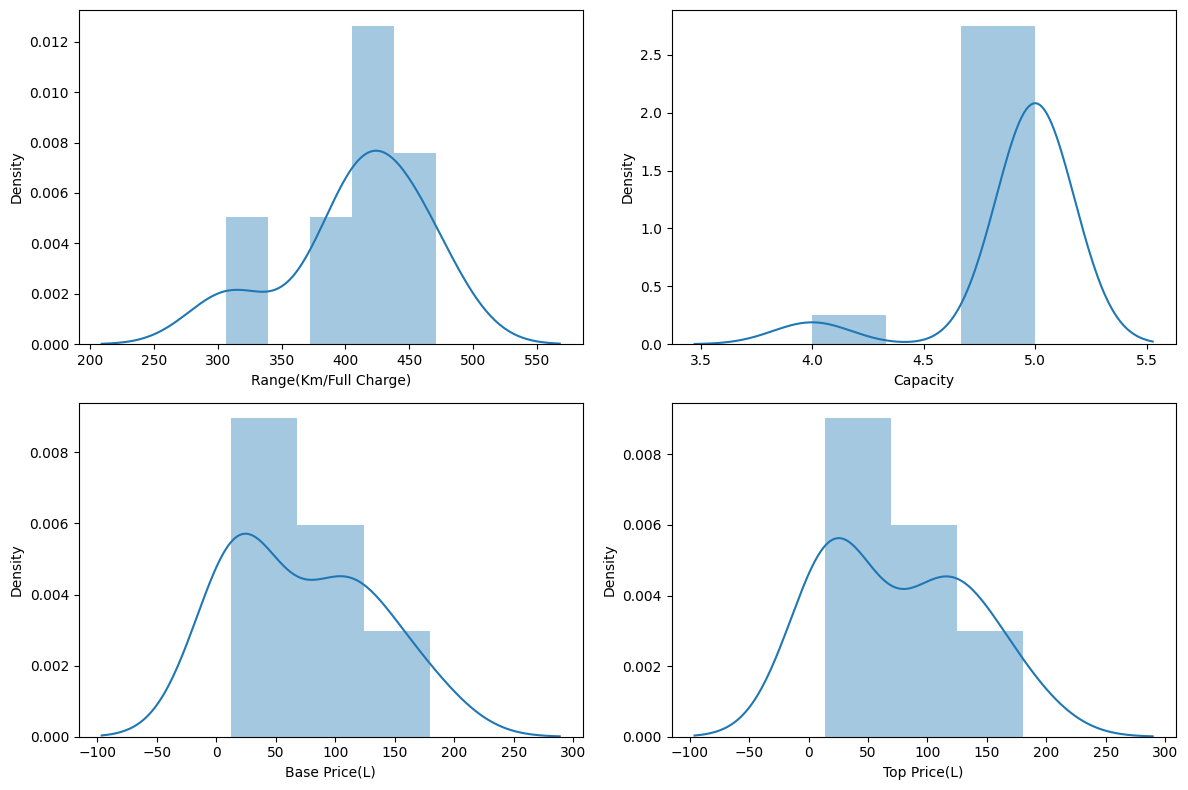

In [22]:
plt.figure(figsize = (12,8))
for i in range(len(num_cols)):
  plt.subplot(len(num_cols)//2,2,i+1)
  sns.distplot(df[num_cols[i]])
plt.tight_layout()
plt.show()

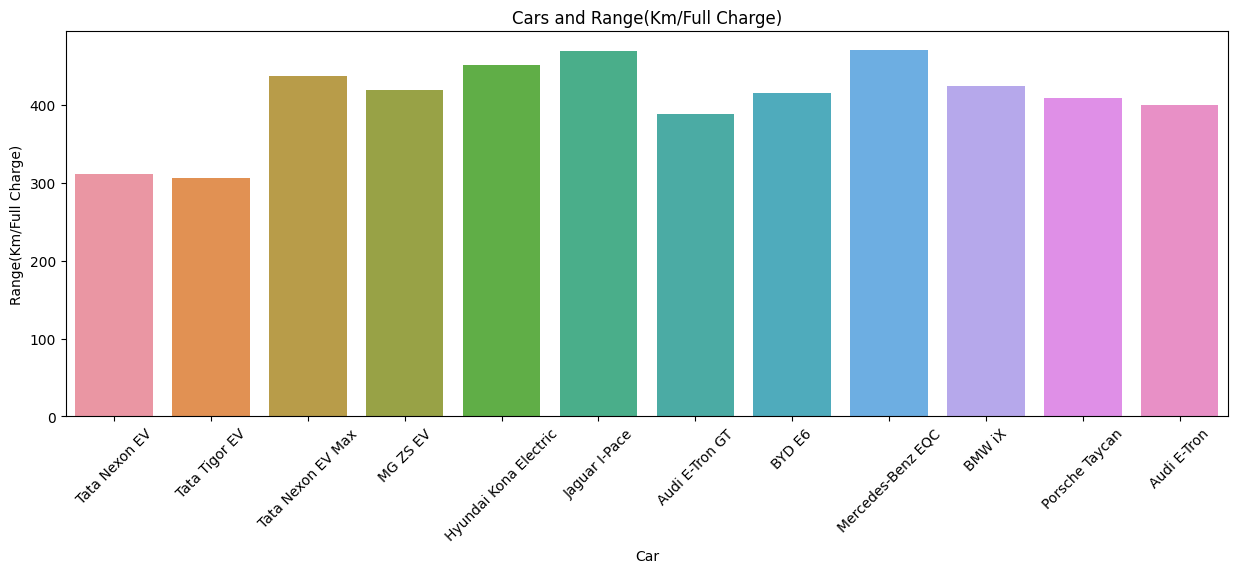

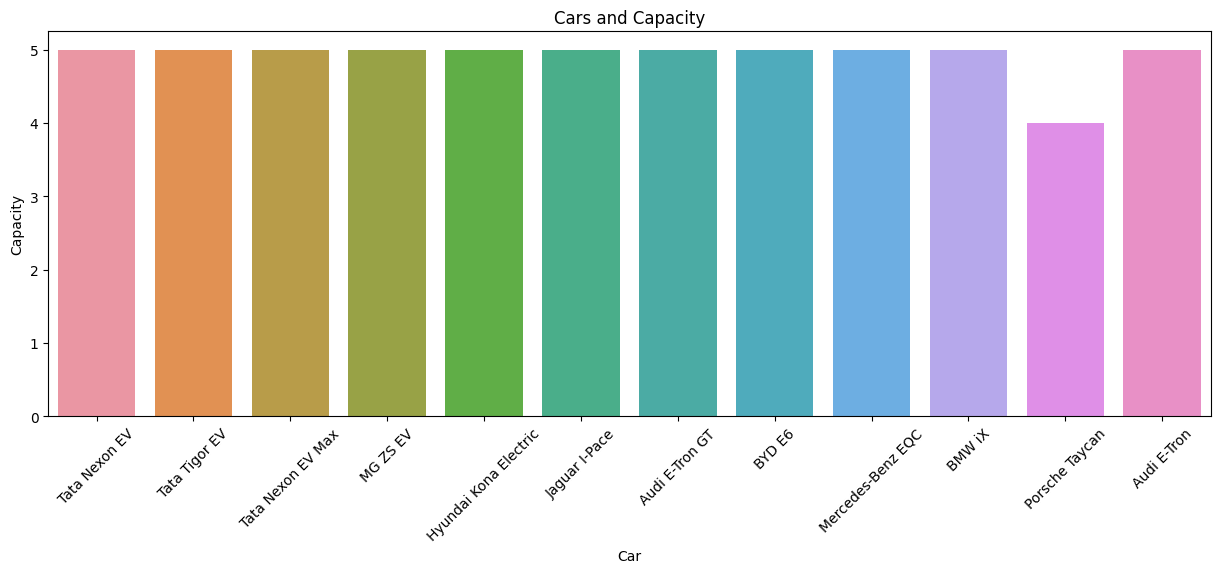

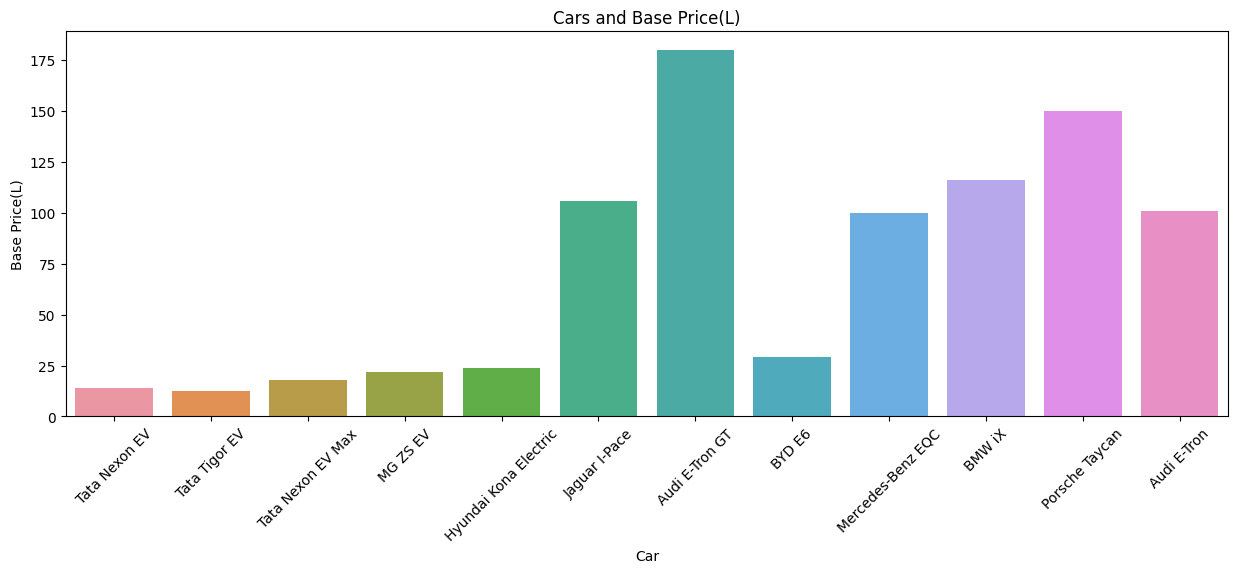

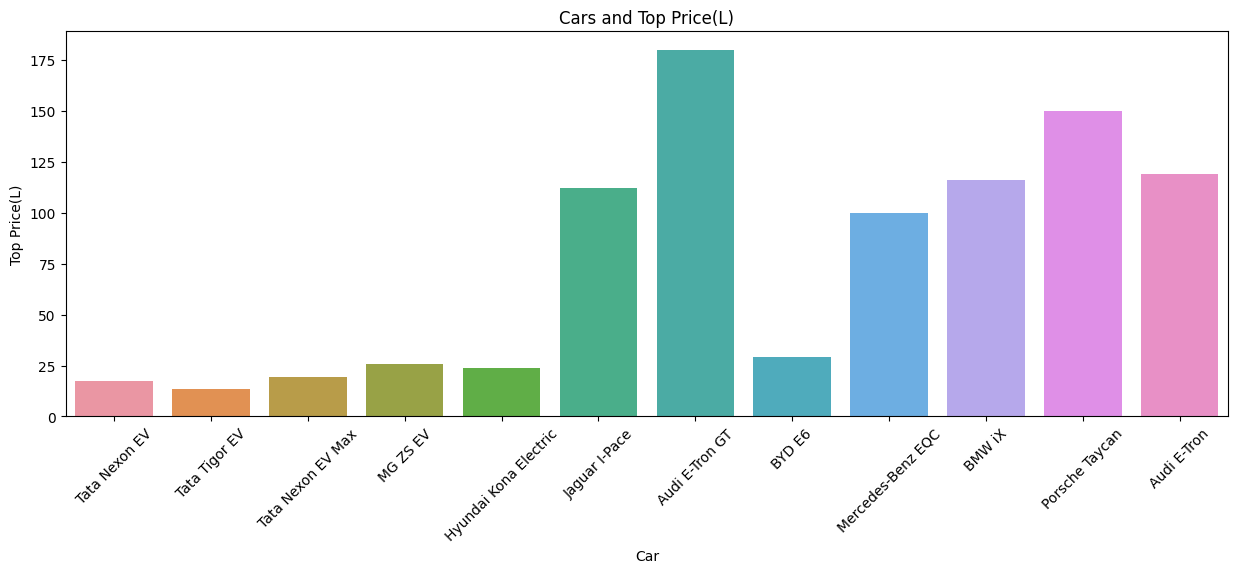

In [23]:
for i in num_cols:
  plt.figure(figsize = (15,5))
  sns.barplot(data = df,x = 'Car',y = i)
  plt.title('Cars and {}'.format(i))
  plt.xticks(rotation = 45)
  plt.show()

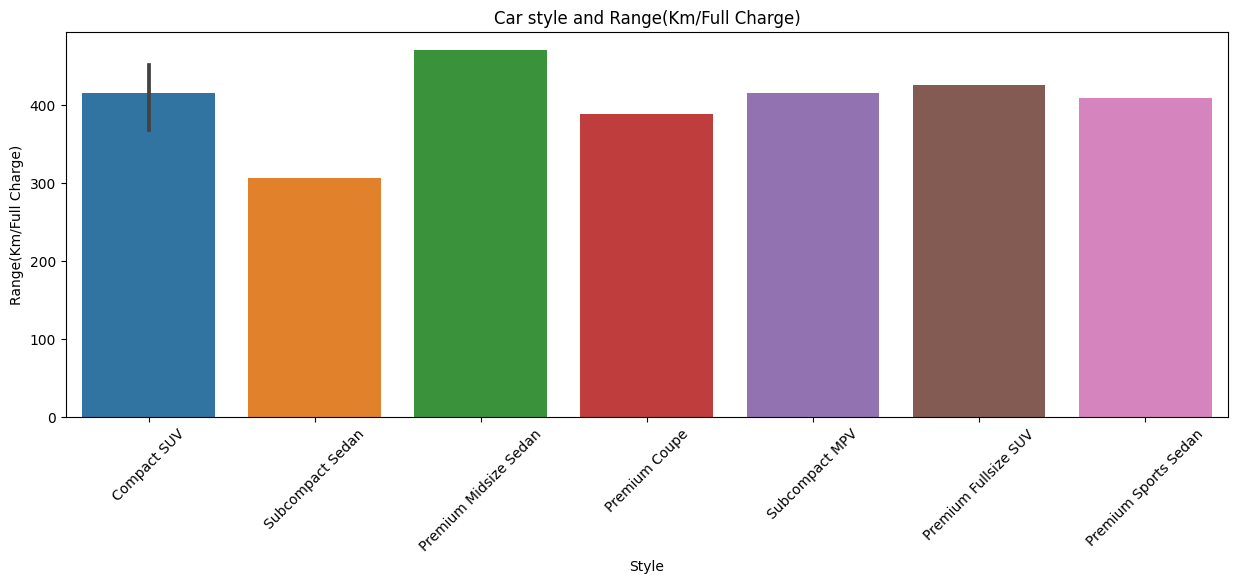

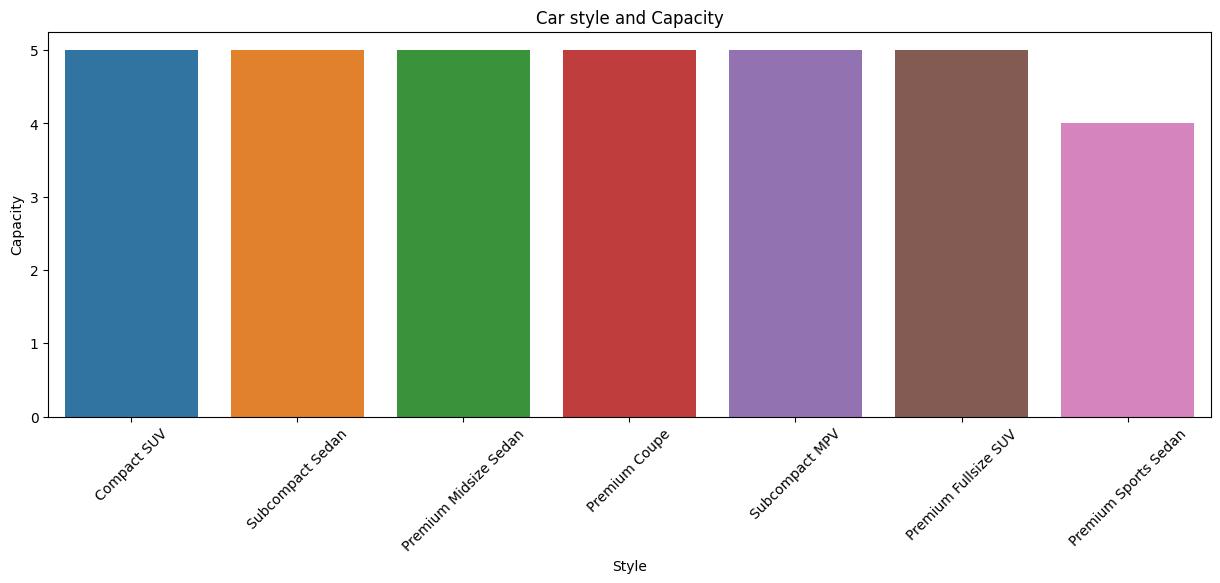

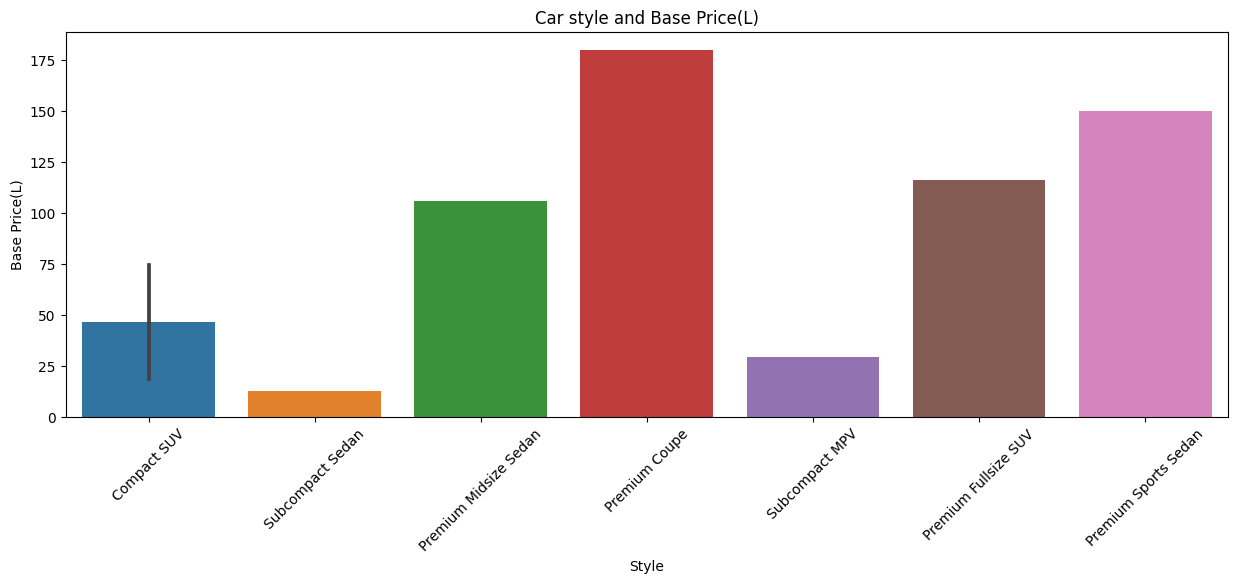

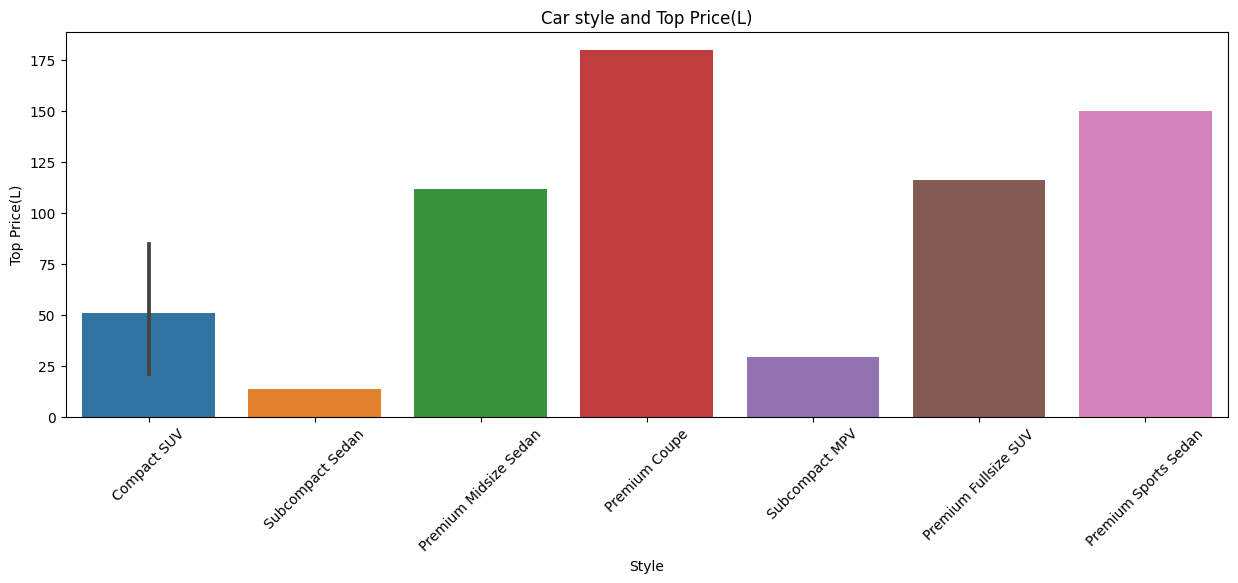

In [24]:
for i in num_cols:
  plt.figure(figsize = (15,5))
  sns.barplot(data = df,x = 'Style',y = i)
  plt.title('Car style and {}'.format(i))
  plt.xticks(rotation = 45)
  plt.show()

In [25]:
num_cols

Index(['Range(Km/Full Charge)', 'Capacity', 'Base Price(L)', 'Top Price(L)'], dtype='object')

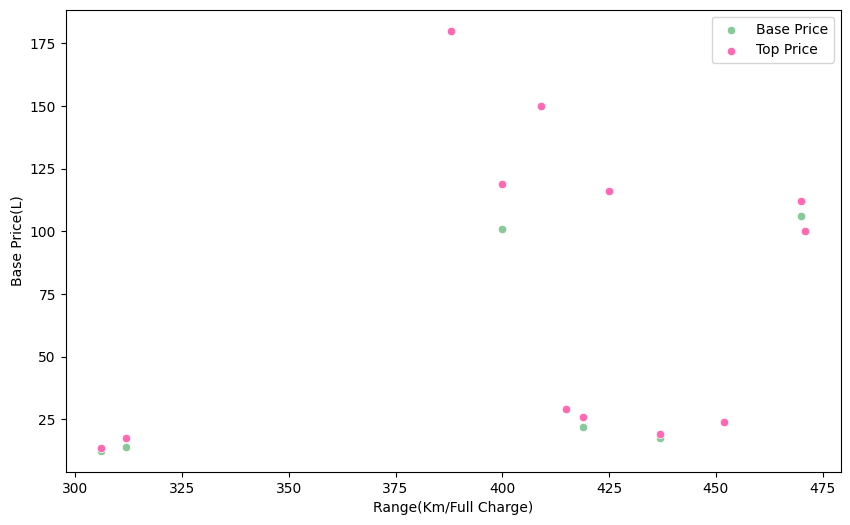

In [26]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df,x = 'Range(Km/Full Charge)',y = 'Base Price(L)',color = '#88c999')
sns.scatterplot(data = df,x = 'Range(Km/Full Charge)',y = 'Top Price(L)',color = 'hotpink')
plt.legend(['Base Price','Top Price'])
plt.show()

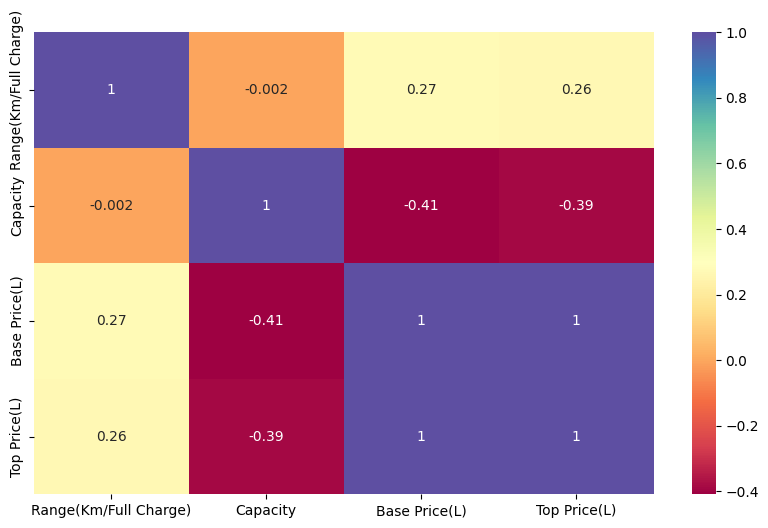

In [27]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),cmap = 'Spectral',annot = True)
plt.show()

## Clustering Analysis

In [28]:
X = df.iloc[:,2:].values

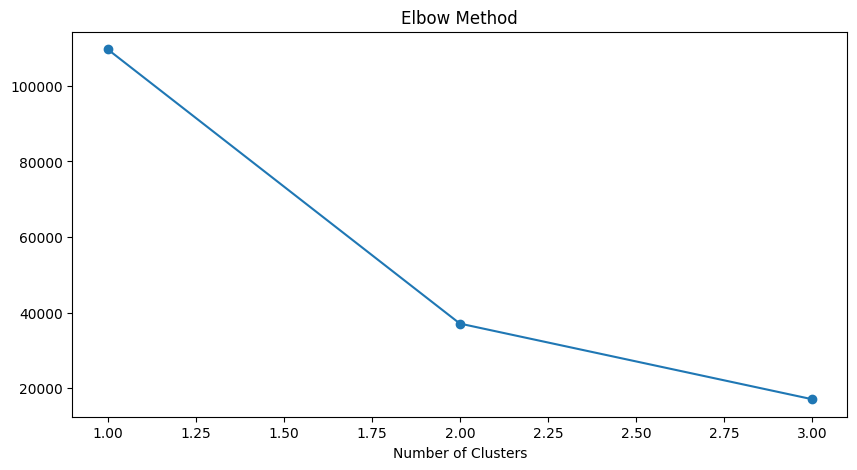

In [29]:
from sklearn.cluster import KMeans
car = []
for i in range(1,4):
  kmeans = KMeans(n_clusters = i,init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  car.append(kmeans.inertia_)

plt.figure(figsize = (10,5))
plt.plot(range(1,4),car,'o-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.show()

According to the scree plot of the cost function above, we consider choosing the number of cluster k = 2. It will be the optimal number of clusters for KMeans cluster analysis.

In [30]:
kmeans = KMeans(n_clusters = 2,init = 'k-means++',random_state = 42)
clusters = kmeans.fit_predict(X)

In [31]:
df['Labels'] = clusters
df

,Car,Style,Range(Km/Full Charge),Capacity,Base Price(L),Top Price(L),Labels
0,Tata Nexon EV,Compact SUV,312.0,5,13.99,17.40,1
1,Tata Tigor EV,Subcompact Sedan,306.0,5,12.49,13.64,1
2,Tata Nexon EV Max,Compact SUV,437.0,5,17.74,19.24,1
3,MG ZS EV,Compact SUV,419.0,5,21.99,25.88,1
4,Hyundai Kona Electric,Compact SUV,452.0,5,23.79,23.98,1
5,Jaguar I-Pace,Premium Midsize Sedan,470.0,5,106.00,112.00,0
6,Audi E-Tron GT,Premium Coupe,388.0,5,180.00,180.00,0
7,BYD E6,Subcompact MPV,415.0,5,29.15,29.15,1
8,Mercedes-Benz EQC,Compact SUV,471.0,5,100.00,100.00,0
9,BMW iX,Premium Fullsize SUV,425.0,5,116.00,116.00,0


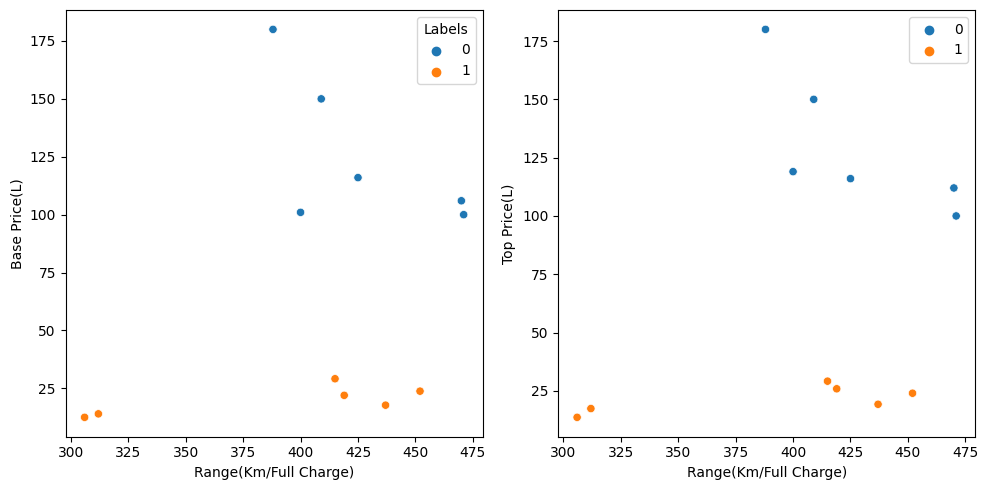

In [32]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.scatterplot(data = df,x = 'Range(Km/Full Charge)',y = 'Base Price(L)',hue = 'Labels')
plt.subplot(1,2,2)
sns.scatterplot(data = df,x = 'Range(Km/Full Charge)',y = 'Top Price(L)',hue = 'Labels')
plt.legend()
plt.tight_layout()
plt.show()